# Car Price Prediction Project

# Importing the required libraries.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('used_cars.csv') #importing the collected data
df

,LOCATION,YEAR,BRAND,MODEL,VARIANT,KM_DRIVEN,FUEL,NO_OF_OWNERS,PRICE
0,New Delhi,2019,Toyota,Innova Crysta 2.4 VX 7 STR,Manual,"31,235 km",Diesel,1st Owner,"₹18,00,000"
1,New Delhi,2015,Mahindra,TUV300 T8 AT,Automatic,"65,766 km",Diesel,1st Owner,"₹5,16,000"
2,New Delhi,2015,Maruti,Ertiga ZDI,Manual,"65,754 km",Diesel,1st Owner,"₹5,99,000"
3,New Delhi,2019,Renault,TRIBER 1.0 RXT,NaN,"48,151 km",Petrol,1st Owner,"₹4,99,000"
4,New Delhi,2018,Maruti,Vitara Brezza VDI AMT,Manual,"28,944 km",Diesel,1st Owner,"₹8,15,000"
...,...,...,...,...,...,...,...,...,...
6446,Ahmedabad,2017,Honda,BR-V 1.5 i- DTEC S,Manual,"1,34,191 km",Diesel,1st Owner,"₹6,05,999"
6447,Ahmedabad,2017,Maruti,Eeco 5 STR,Manual,"67,514 km",Petrol,1st Owner,"₹2,98,299"
6448,Ahmedabad,2018,Honda,WR-V 1.2 i-VTEC VX MT,Manual,"24,484 km",Petrol,1st Owner,"₹7,44,399"
6449,Ahmedabad,2017,Maruti,Eeco 5 STR WITH AC PLUSHTR,Manual,"46,169 km",Petrol + CNG,2nd Owner,"₹3,93,499"


# EDA.
Starting the EDA with general play around with the data.

In [3]:
df.columns

Index(['LOCATION', 'YEAR', 'BRAND', 'MODEL', 'VARIANT', 'KM_DRIVEN', 'FUEL',
       'NO_OF_OWNERS', 'PRICE'],
      dtype='object')

In [4]:
df.LOCATION.unique()

array(['New Delhi', 'Noida', 'Gurgaon', 'Mumbai', 'Pune', 'Bengaluru',
       'Hyderabad', 'Chennai', 'Kolkata', 'Ahmedabad'], dtype=object)

In [6]:
df.YEAR.unique()

array([2019, 2015, 2018, 2016, 2017, 2014, 2013, 2020, 2021, 2012, 2009,
       2010, 2011, 2008, 2007], dtype=int64)

In [7]:
df.BRAND.unique()

array(['Toyota', 'Mahindra', 'Maruti', 'Renault', 'Hyundai', 'Ford',
       'Honda', 'Tata', 'Nissan', 'Volkswagen', 'Skoda', 'Chevrolet',
       'Datsun', 'BMW', 'Mercedes', 'Audi', 'Volvo', 'Ssangyong', 'Force',
       'Mitsubishi', 'Jeep', 'Landrover', 'ISUZU', 'Fiat', 'Jaguar'],
      dtype=object)

In [8]:
df.VARIANT.unique()

array(['Manual', 'Automatic', nan], dtype=object)

In [9]:
df.NO_OF_OWNERS.unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner'], dtype=object)

In [14]:
df.FUEL.unique()

array(['Diesel', 'Petrol', 'Petrol + CNG', 'Petrol + LPG'], dtype=object)

In [10]:
df.duplicated().sum()

2260

In [11]:
df.isnull().sum()

LOCATION          0
YEAR              0
BRAND             0
MODEL             0
VARIANT         280
KM_DRIVEN         0
FUEL              0
NO_OF_OWNERS      0
PRICE             0
dtype: int64

In [12]:
df = df.drop_duplicates() #Deleting duplicates

In [13]:
df.isnull().sum() 

LOCATION          0
YEAR              0
BRAND             0
MODEL             0
VARIANT         169
KM_DRIVEN         0
FUEL              0
NO_OF_OWNERS      0
PRICE             0
dtype: int64

VARIANT has 169 null values. It will be replaced with NA.

In [15]:
df['VARIANT'] = df['VARIANT'].fillna('NA')

In [16]:
DF = df.copy()

In [17]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
catagorical_data = ['LOCATION' , 'YEAR', 'BRAND', 'MODEL', 'VARIANT', 'FUEL' , 'NO_OF_OWNERS' ]

for i in catagorical_data:
    DF[i]=DF[i].astype('str')
    DF[i]=LE.fit_transform(DF[i])

In [18]:
DF['PRICE'] = DF['PRICE'].str.replace(r'\D', '').astype(int)
DF['KM_DRIVEN'] = DF['KM_DRIVEN'].str.replace(r'\D', '').astype(int)

In [19]:
DF.describe()

,LOCATION,YEAR,BRAND,MODEL,VARIANT,KM_DRIVEN,FUEL,NO_OF_OWNERS,PRICE
count,4191.000000,4191.000000,4191.000000,4191.000000,4191.000000,4191.000000,4191.000000,4191.000000,4.191000e+03
mean,5.069673,8.022429,12.831067,383.037938,0.887616,61036.793605,0.607492,0.267955,6.171740e+05
std,2.904924,2.809967,5.283071,235.455490,0.424789,40382.806319,0.539894,0.521171,4.005465e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,411.000000,0.000000,0.000000,7.200000e+04
25%,3.000000,6.000000,8.000000,187.000000,1.000000,31995.000000,0.000000,0.000000,3.498990e+05
50%,6.000000,8.000000,14.000000,348.000000,1.000000,53590.000000,1.000000,0.000000,4.993990e+05
75%,8.000000,10.000000,14.000000,594.000000,1.000000,81983.000000,1.000000,0.000000,7.768990e+05
max,9.000000,14.000000,24.000000,778.000000,2.000000,428123.000000,3.000000,3.000000,4.725000e+06


In [20]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4191 entries, 0 to 6417
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LOCATION      4191 non-null   int32
 1   YEAR          4191 non-null   int32
 2   BRAND         4191 non-null   int32
 3   MODEL         4191 non-null   int32
 4   VARIANT       4191 non-null   int32
 5   KM_DRIVEN     4191 non-null   int32
 6   FUEL          4191 non-null   int32
 7   NO_OF_OWNERS  4191 non-null   int32
 8   PRICE         4191 non-null   int32
dtypes: int32(9)
memory usage: 180.1 KB


# VISUALIZATION

# Correlation

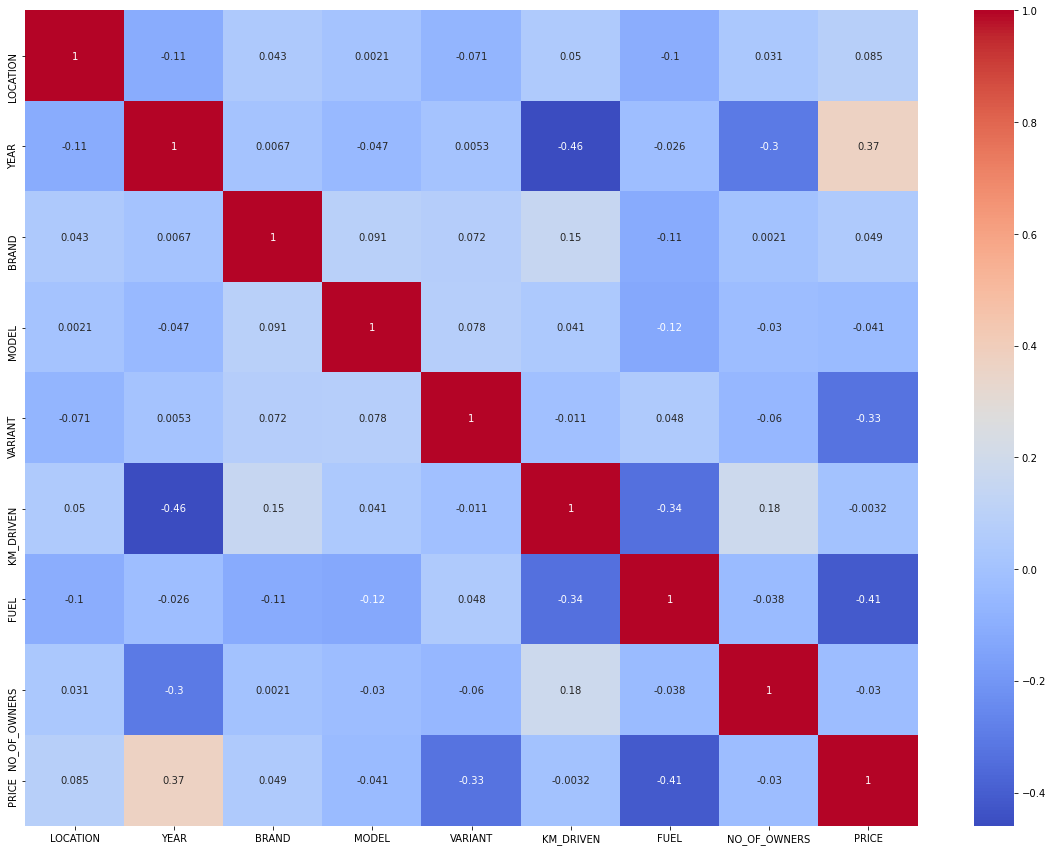

In [67]:
plt.figure(figsize=(20,15))
sns.heatmap(DF.corr(), annot = True, cmap= "coolwarm")
plt.show()

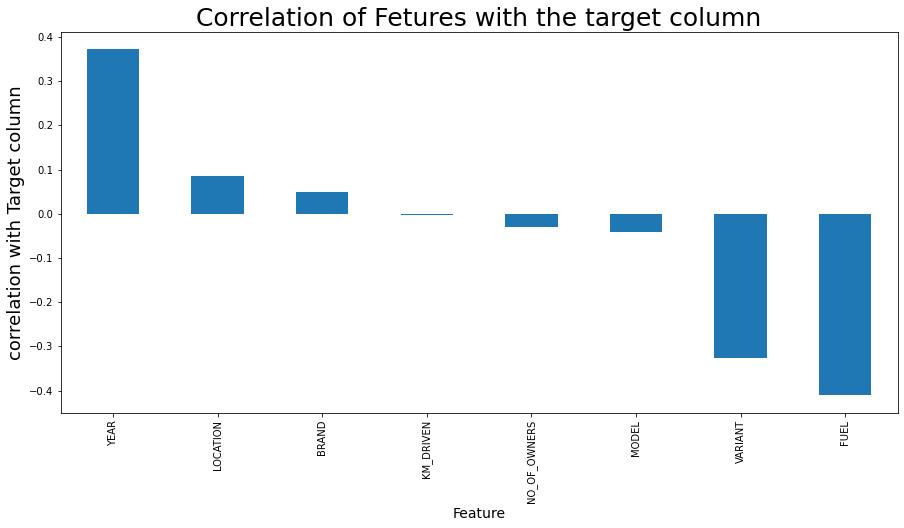

KEY OBSERVATIONS:
 


,PRICE
YEAR,0.371951
LOCATION,0.084673
BRAND,0.049041
KM_DRIVEN,-0.003174
NO_OF_OWNERS,-0.029634
MODEL,-0.040938
VARIANT,-0.326029
FUEL,-0.410746


In [22]:
plt.figure(figsize=(15,7))
DF.corr()["PRICE"].sort_values(ascending=False).drop(["PRICE"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()
cor=pd.DataFrame(DF.corr()["PRICE"].sort_values(ascending=False)).drop(["PRICE"])
print("KEY OBSERVATIONS:\n ")
cor

### Key Observations:
   From above we can clearly see that YEAR is postively correlated to PRICE and FUEL and VARIANT is negative correlated to PRICE.

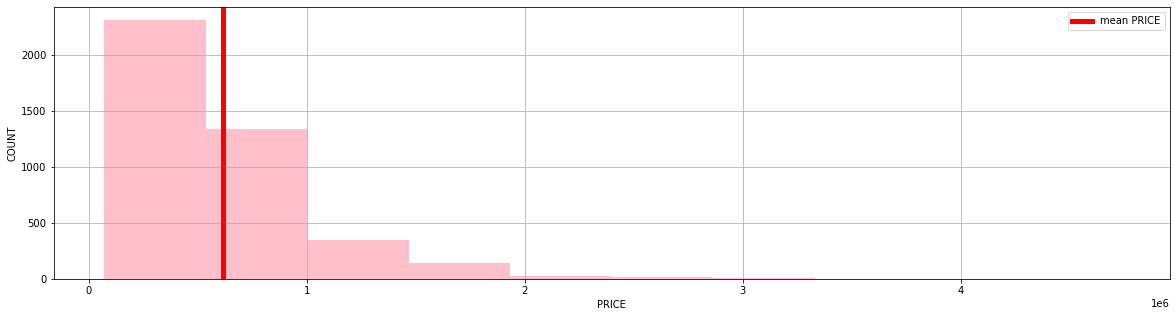

MATHEMATICAL SUMMARY OF PRICE :
 count    4.191000e+03
mean     6.171740e+05
std      4.005465e+05
min      7.200000e+04
25%      3.498990e+05
50%      4.993990e+05
75%      7.768990e+05
max      4.725000e+06
Name: PRICE, dtype: float64


In [25]:
DF.PRICE.hist(bins =10,figsize=(20,5), color ="pink")
plt.axvline(np.mean(DF.PRICE), linewidth = 5, color = "red", label = "mean PRICE")
plt.xlabel("PRICE")
plt.ylabel("COUNT")
plt.legend()
plt.show()
print("MATHEMATICAL SUMMARY OF PRICE :\n",\
      DF.PRICE.describe())

### Key observations:
1. Mean of the price is Rs: 6,17,174, the price is distributed between Rs: 72,000 to Rs: 47,25,000.
2. Most of the Car price is leser than the Mean i.e Rs: 6,17,174.

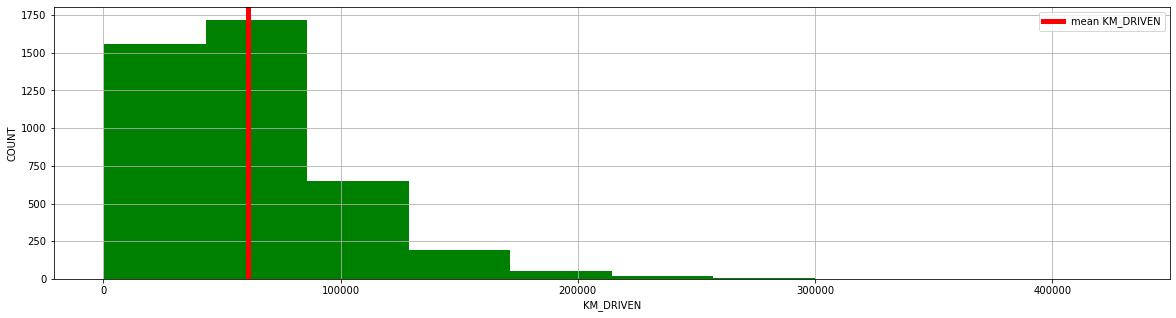

MATHEMATICAL SUMMARY OF PRICE :
 count      4191.000000
mean      61036.793605
std       40382.806319
min         411.000000
25%       31995.000000
50%       53590.000000
75%       81983.000000
max      428123.000000
Name: KM_DRIVEN, dtype: float64


In [27]:
DF.KM_DRIVEN.hist(bins =10,figsize=(20,5), color ="green")
plt.axvline(np.mean(DF.KM_DRIVEN), linewidth = 5, color = "red", label = "mean KM_DRIVEN")
plt.xlabel("KM_DRIVEN")
plt.ylabel("COUNT")
plt.legend()
plt.show()
print("MATHEMATICAL SUMMARY OF PRICE :\n",\
      DF.KM_DRIVEN.describe())

### Key observations:
1. Mean of the KM_DRIVEN is 61036.79 kms and the maximum KMS driven is  428123 kms.
2. Most of the Cars comes to selling around below 61036 kilometers driven.

## Multivariate Analysis:

In [28]:
DF1 = df.copy()

In [29]:
DF1['PRICE'] = DF1['PRICE'].str.replace(r'\D', '').astype(int)
DF1['KM_DRIVEN'] = DF1['KM_DRIVEN'].str.replace(r'\D', '').astype(int)

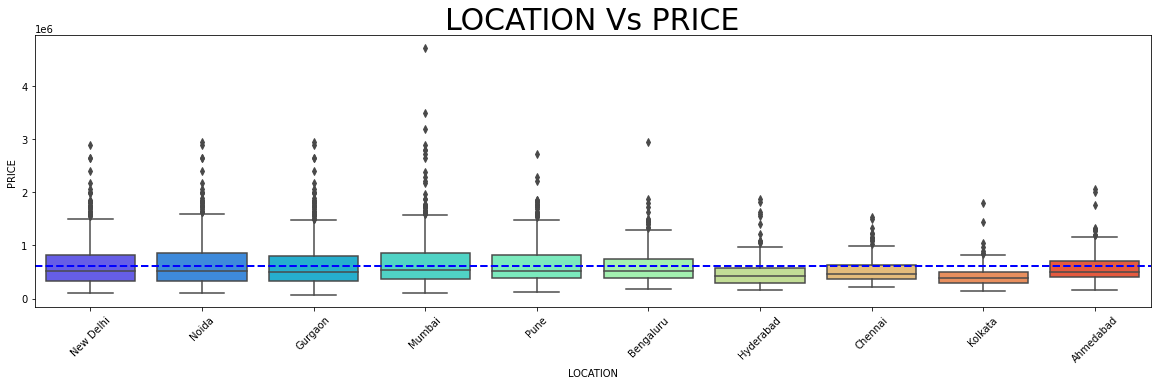

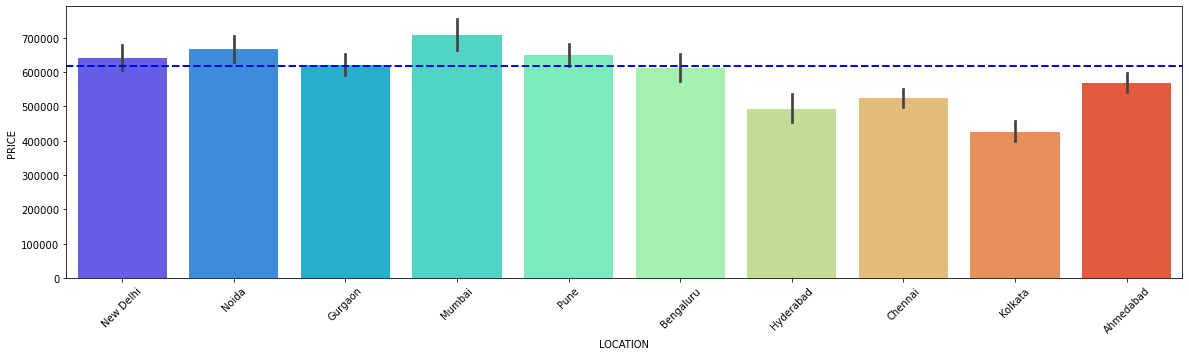

In [30]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "LOCATION",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("LOCATION Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "LOCATION",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

### Key observations:
1. New Delhi, Noida, Gurgaon, Mumbai,Bengaluru have the costliest cars.
2. Hyderabad, Chennai, Kolkata have cars comparatively cheaper.

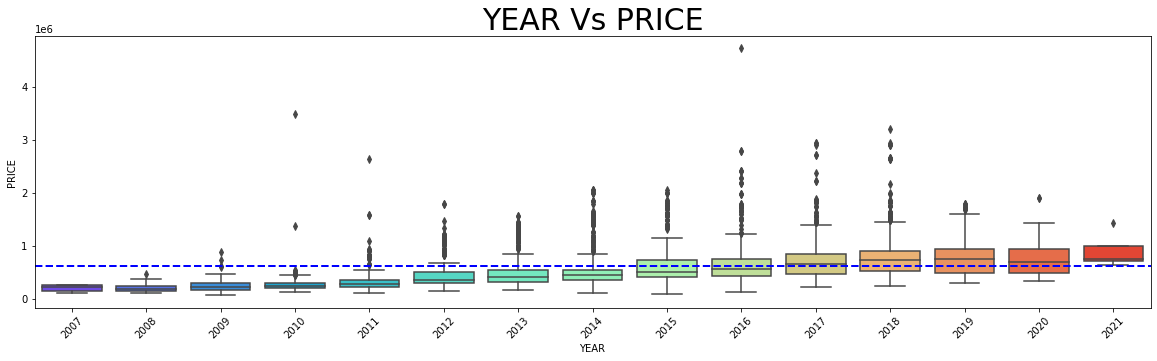

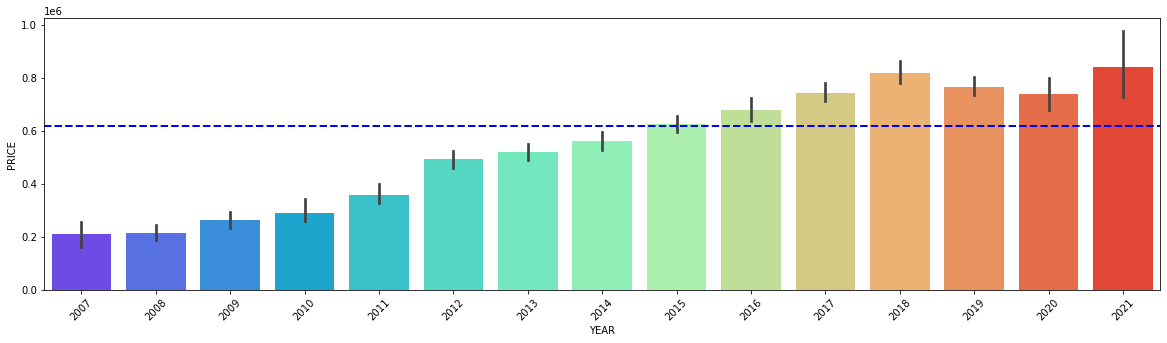

In [31]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "YEAR",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("YEAR Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "YEAR",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

### Key observations:
1. From 2016 to 2021 cars are being sold higher in PRICE and also above average PRICE.

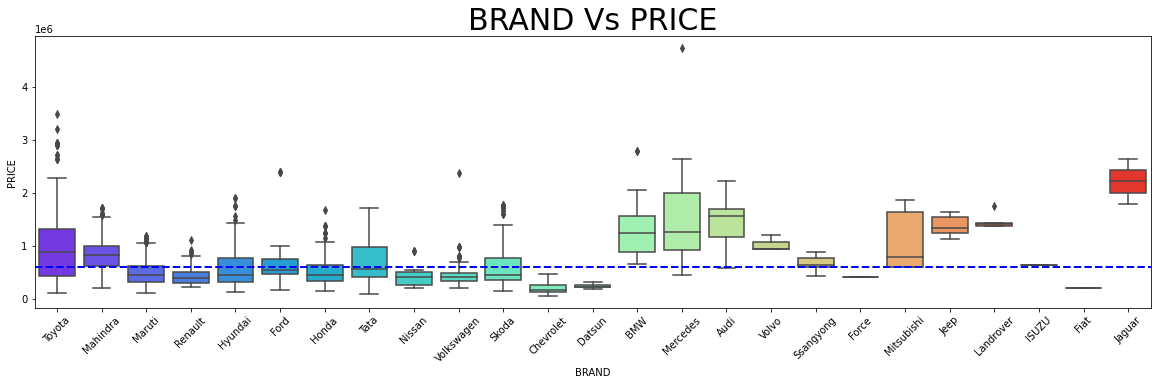

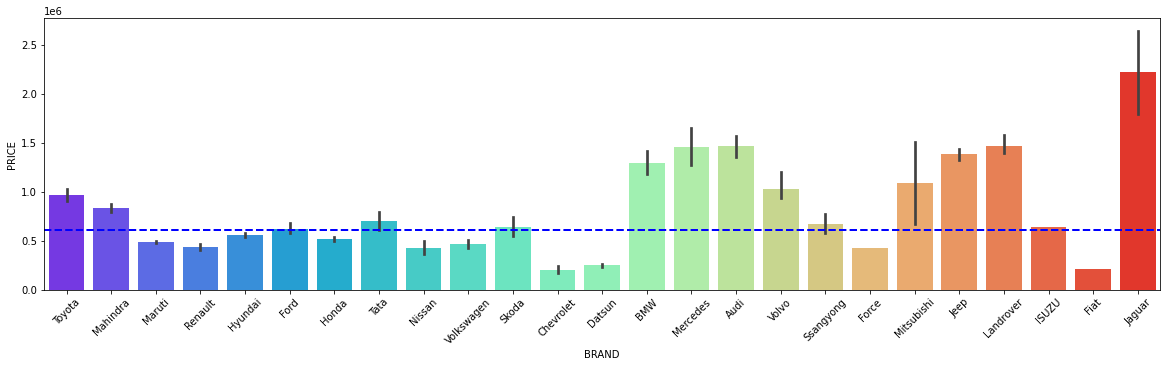

In [32]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "BRAND",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("BRAND Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "BRAND",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

### Key observations:
1. Luxury Cars are obviously highly priced.
2. Chevrolet, Datsun and Fiat Cars are much below than the mean price.

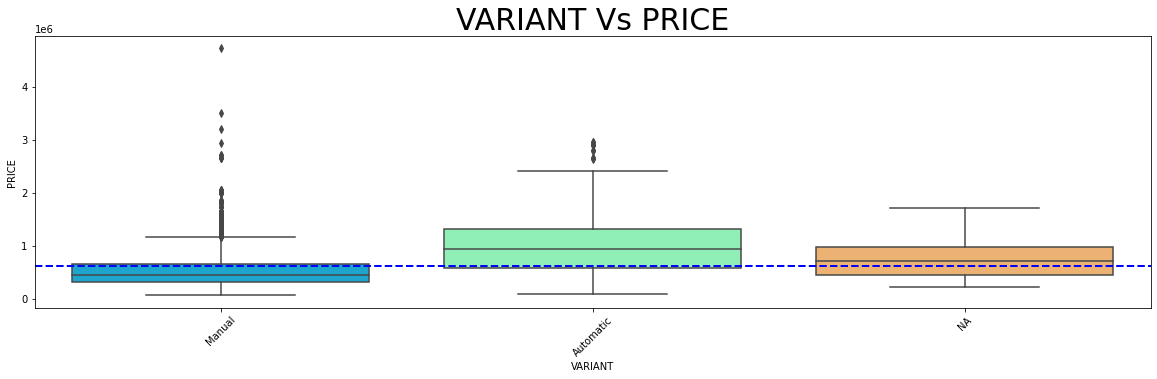

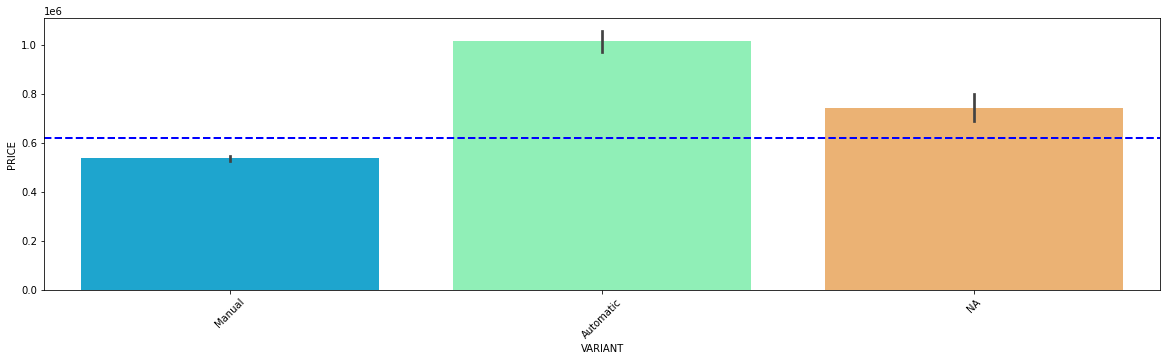

In [33]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "VARIANT",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("VARIANT Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "VARIANT",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

### Key observations:
1. Automatic Variants are costlier.

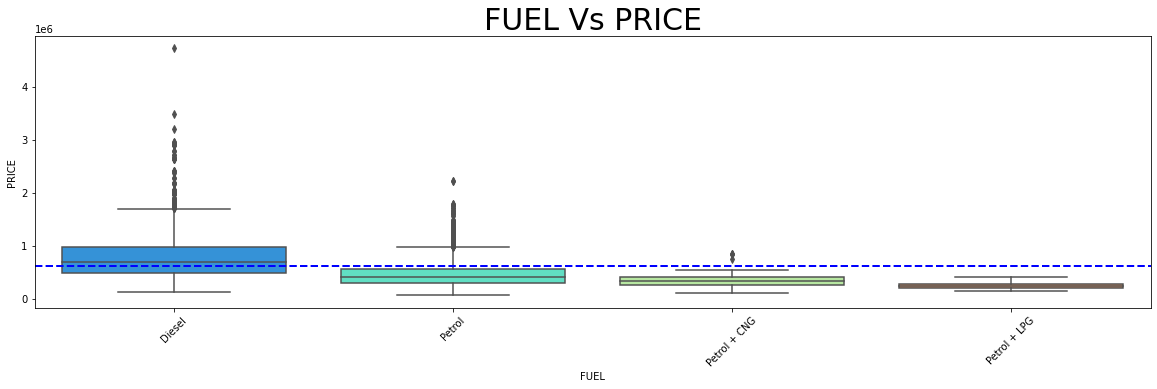

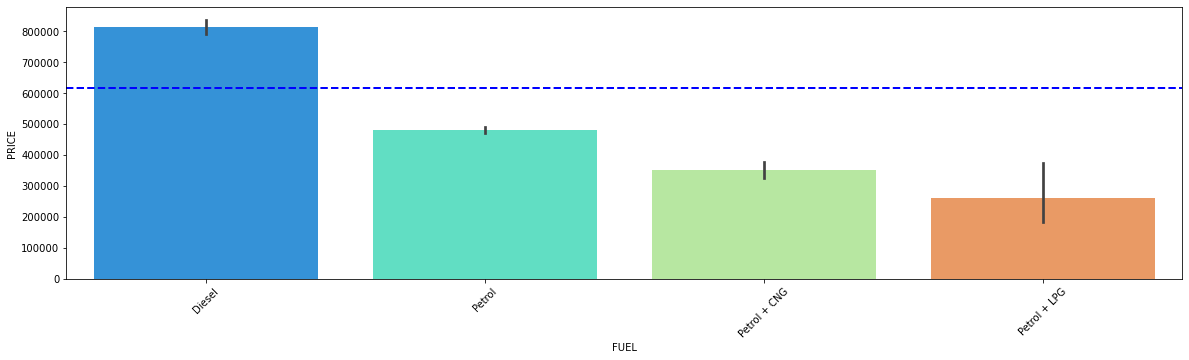

In [34]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "FUEL",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("FUEL Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "FUEL",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

### Key observations:
1. Diesel Cars are expensive.
2. Petrol Cars are costlier than CNG and LPG fuel types.

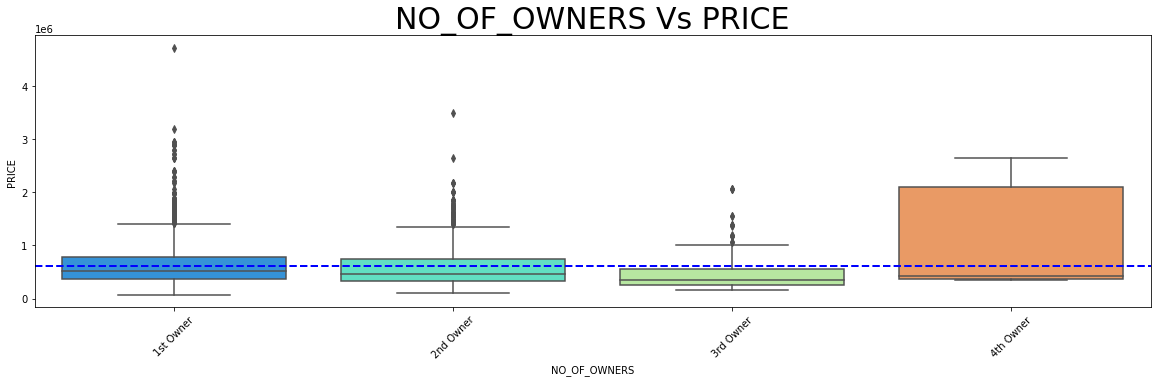

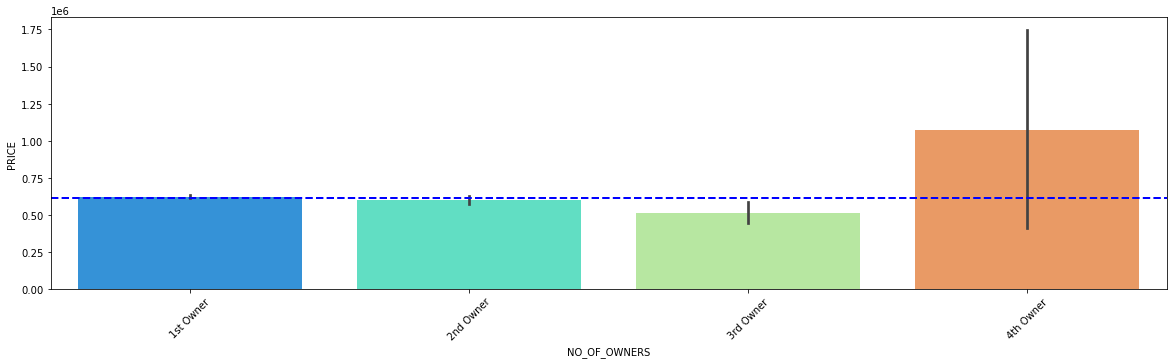

In [35]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "NO_OF_OWNERS",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("NO_OF_OWNERS Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "NO_OF_OWNERS",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

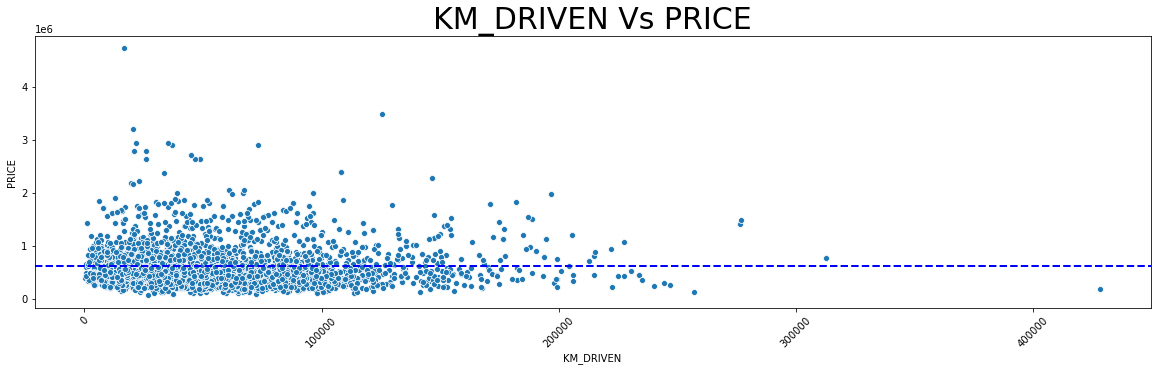

In [36]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.scatterplot(x = 'KM_DRIVEN',y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("KM_DRIVEN Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

### Key Observations:
1. The lesser kms driven cars are costilier. 

## Data Pre-Processing.

### Lets observe the skewness and outliers in the Data.

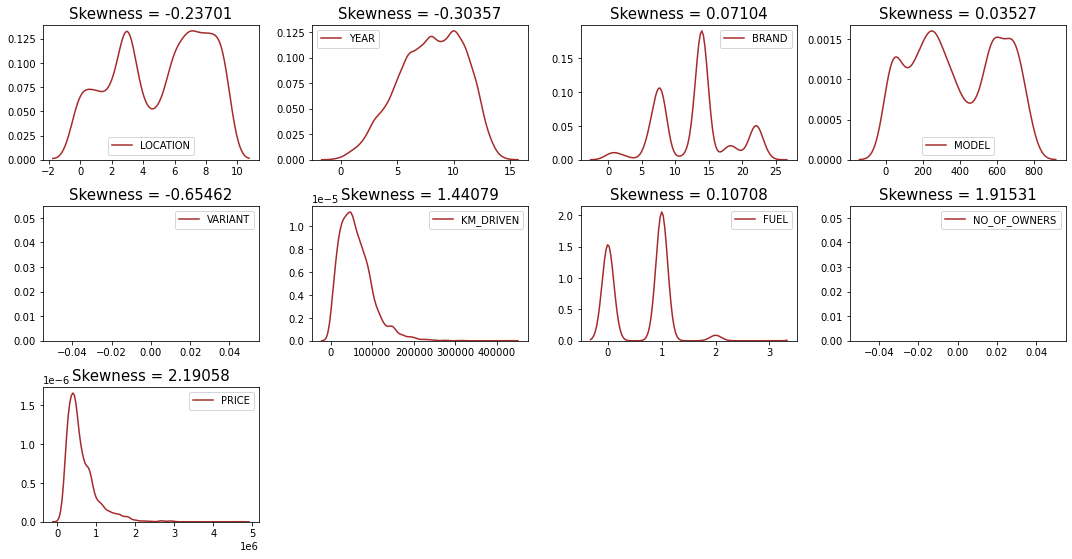

In [38]:
plt.figure(figsize=(15,15))
for i in range (0, len(DF.columns)):
    plt.subplot(6,4,i+1)         
    sns.kdeplot(DF[DF.columns[i]], color = "brown")
    plt.title(f"Skewness = {round(DF[DF.columns[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

In [39]:
from scipy.stats import zscore

z= np.abs(zscore(DF))
threshold= 3
df_new = DF[(z < 3).all(axis=1)]

In [72]:
print(f"Orginal Data {DF.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((4191-3928)/4191)*100}%")

Orginal Data (4191, 9)
After Removing outliers (3928, 9)
The percentage of data loss 6.275351944643283%


Loss of 6.27% Data is managabable. For better results, Let's go for outliers removed data.

In [41]:
x_1=df_new.drop(["PRICE"], axis = 1)
y_1=df_new.PRICE

In [42]:
x_1

,LOCATION,YEAR,BRAND,MODEL,VARIANT,KM_DRIVEN,FUEL,NO_OF_OWNERS
0,7,12,22,373,1,31235,0,0
1,7,8,13,617,0,65766,0,0
2,7,8,14,289,1,65754,0,0
3,7,12,18,609,2,48151,1,0
4,7,11,14,674,1,28944,0,0
...,...,...,...,...,...,...,...,...
6412,0,12,14,255,1,80770,1,0
6414,0,9,22,378,0,176897,0,1
6415,0,8,14,521,1,163159,0,0
6416,0,10,13,397,1,39802,0,0


In [68]:
y_1

0       1800000
1        516000
2        599000
3        499000
4        815000
         ...   
6412     481099
6414    1325799
6415     581699
6416     321099
6417     697512
Name: PRICE, Length: 3928, dtype: int32

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_1 = sc.fit_transform(x_1)

In [44]:
x_1

array([[ 0.672856  ,  1.39366677,  1.8058948 , ..., -0.7562947 ,
        -1.16881693, -0.50611862],
       [ 0.672856  , -0.04457903,  0.06029031, ...,  0.2196599 ,
        -1.16881693, -0.50611862],
       [ 0.672856  , -0.04457903,  0.25424637, ...,  0.21932074,
        -1.16881693, -0.50611862],
       ...,
       [-1.73956394, -0.04457903,  0.25424637, ...,  2.97229222,
        -1.16881693, -0.50611862],
       [-1.73956394,  0.67454387,  0.06029031, ..., -0.51416436,
        -1.16881693, -0.50611862],
       [-1.73956394,  1.03410532,  1.61193875, ...,  0.15903546,
         0.71355818, -0.50611862]])

#  Model Building


## Selecting parameters for training

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size = .30, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train_1,y_train_1)
    y_pred_1 = mod.predict(x_test_1)
    tempacc = r2_score(y_test_1,y_pred_1)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 47.312716496928076 found on randomstate 220


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate)

In [47]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

### Shortlisting the best model

In [48]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]

model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForestRegressor"]

In [49]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train,y_train)
    print("Score of", m, "is:", m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test,predm))
    mean_abs_e.append(mean_absolute_error(y_test,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test,predm))
    mean_sqr_e.append(mean_squared_error(y_test,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 SCORE: ", r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.42151295586796855

ERROR:
MEAN ABSOLUTE ERROR:  174396.86781996724
MEAN SQUARED ERROR:  55581766507.33339
ROOT MEAN SQUARED ERROR : 235757.8556640974
R2 SCORE:  0.46915738946917784
**********************************************************************************************************



Score of Lasso() is: 0.4215129557911913

ERROR:
MEAN ABSOLUTE ERROR:  174396.67154541684
MEAN SQUARED ERROR:  55581836712.688965
ROOT MEAN SQUARED ERROR : 235758.00455697993
R2 SCORE:  0.46915671896162536
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.4215129009205407

ERROR:
MEAN ABSOLUTE ERROR:  174388.2721707623
MEAN SQUARED ERROR:  55582945268.92195
ROOT MEAN SQUARED ERROR : 235760.35559211805
R2 SCORE:  0.46914613151682794
**********************************************************************************************************



Score of ElasticNet() i

In [50]:
mean_score=[]
STD=[]
for m in models:
    CV=cross_val_score(m,x_1,y_1,cv=5,scoring="r2")
    print("SCORE OF",m,"IS as follows...")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS as follows...
SCORE IS: [0.34916648 0.40954384 0.35667696 0.44671946 0.21186911]
MEAN OF SCORE is : 0.35479516826938967
Standard Deviation : 0.07988814059112215
**************************************************************************************************



SCORE OF Lasso() IS as follows...
SCORE IS: [0.34916799 0.40954352 0.35667561 0.44672288 0.21186635]
MEAN OF SCORE is : 0.3547952680207286
Standard Deviation : 0.07988984137169104
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS as follows...
SCORE IS: [0.34918862 0.40955274 0.35660926 0.44678265 0.21199873]
MEAN OF SCORE is : 0.35482640065901294
Standard Deviation : 0.07985690930860198
**************************************************************************************************



SCORE OF ElasticNet() IS as follows...
SCORE IS: [0.32484474 0.36536277 0.24917823 0.42622939 0.25642747]
MEAN OF SCO

In [51]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="CV_mean_score", ascending=False)

,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
8,RandomForestRegressor,0.986186,0.865242,0.093318,55337.211157,8.082784e+09,89904.302130,0.922804
6,DecisionTreeRegressor,1.000000,0.742404,0.178304,59330.901222,1.364676e+10,116819.353396,0.869664
5,KNeighborsRegressor,0.753990,0.523069,0.081861,141374.874338,4.305722e+10,207502.343079,0.588775
7,AdaBoostRegressor,0.464049,0.388622,0.164240,193888.710170,5.434633e+10,233122.989858,0.480957
2,Ridge,0.421513,0.354826,0.079857,174388.272171,5.558295e+10,235760.355592,0.469146
1,Lasso,0.421513,0.354795,0.079890,174396.671545,5.558184e+10,235758.004557,0.469157
0,LinearRegression,0.421513,0.354795,0.079888,174396.867820,5.558177e+10,235757.855664,0.469157
3,ElasticNet,0.373074,0.324409,0.066822,180851.637306,6.200755e+10,249013.148867,0.407787
4,SVR,-0.078356,-0.106140,0.134593,234775.069353,1.124140e+11,335281.974797,-0.073628


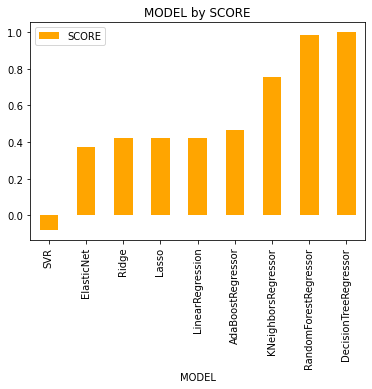

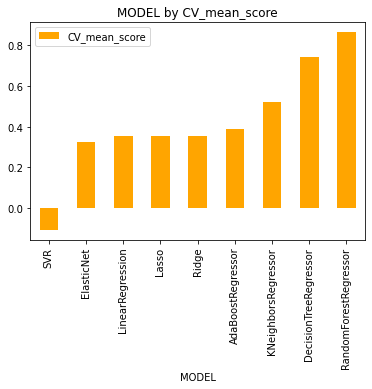

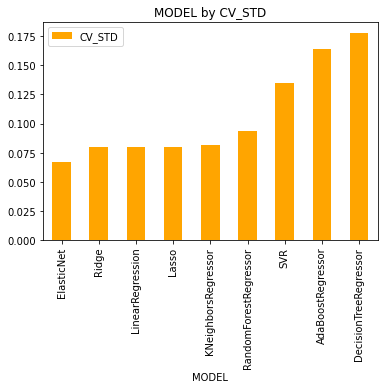

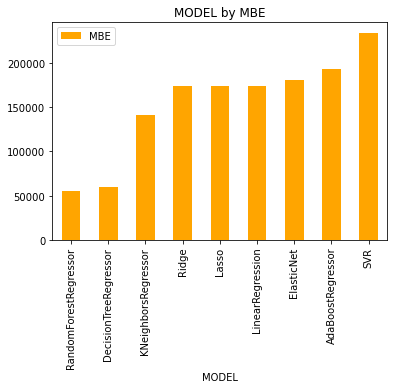

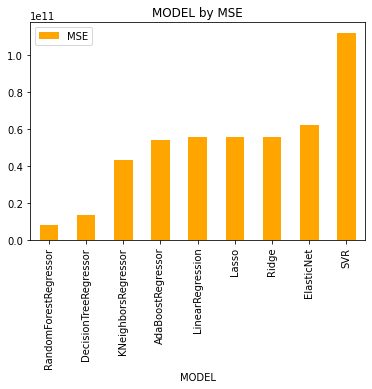

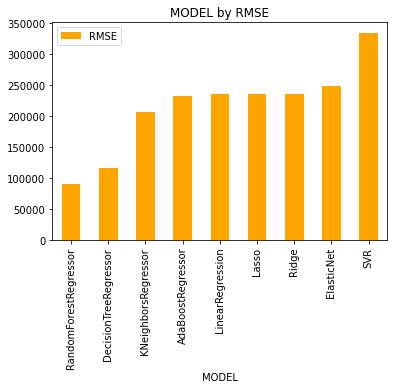

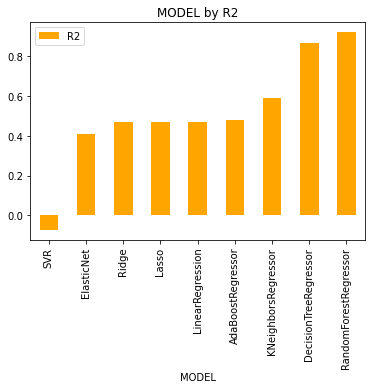

In [52]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = "orange")
    plt.title(f"MODEL by {metric}")
    plt.show()

### From above observation, we can come to a conclusion that Randomforest is the best model with r2 Score of 92.28 lets try in Hyper tuning the same for improved performance and also to reduce the over fitting the Data.

In [53]:
rf = RandomForestRegressor(random_state=42)
cross_val_predict(rf, x_train, y_train, cv=5, n_jobs=-1).mean()

591500.1523693143

In [54]:
rf.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [55]:
predm=rf.predict(x_test)

In [56]:
predm

array([ 406750.25      ,  333590.5       , 1146817.06      ,
        317011.01      ,  255546.17      ,  401562.        ,
        610808.52      ,  852047.43      ,  605153.95      ,
        624341.1       ,  407682.61      , 1039305.13      ,
        353837.39      ,  466959.        ,  313865.09      ,
        662994.08      ,  459158.34      ,  410668.41      ,
        300738.69      ,  572134.75      ,  603398.69      ,
        266394.78      ,  773171.23      ,  615652.53      ,
        849264.93      ,  225488.76      ,  391007.22      ,
        669800.21      ,  553247.98      ,  435453.09      ,
        396879.93      ,  322990.92      ,  526435.67      ,
        538813.36      ,  360351.01      ,  751307.67      ,
        397996.2       ,  348652.48      ,  478356.4       ,
       1299700.04      , 1002204.35      ,  254855.61      ,
       1026784.21      , 1080000.49      ,  181903.79      ,
        799120.        ,  843133.88      ,  354259.2       ,
       1251408.02      ,

In [57]:
rf.score(x_test,y_test), rf.score(x_train,y_train)

(0.9228040743366328, 0.9861859436239138)

In [58]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Model Evaluation

## Hyper Parameter Tuning.

In [59]:
param_grid = [
    {"bootstrap": [True, False],
     "criterion": ["mse", "mae"],
     "n_estimators"      : [10,20,30,50,100],
     "max_features"      : ["auto", "sqrt", "log2"],
     "min_samples_split" : [2,4,8],
    }
]

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, verbose = 0)

In [60]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['mse', 'mae'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': [2, 4, 8],
                          'n_estimators': [10, 20, 30, 50, 100]}])

In [61]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mae', max_features='log2',
                      random_state=42)

In [62]:
reg_final_model = grid_search.best_estimator_

In [63]:
reg_final_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, criterion='mae', max_features='log2',
                      random_state=42)

In [64]:
grid_search.best_score_

0.8920088365103572

In [65]:
reg_final_model.score(x_train_1,y_train_1), reg_final_model.score(x_test_1,y_test_1)

(0.9837668875280741, 0.9852848646873325)

# Saving the final model

In [66]:
import joblib
joblib.dump(reg_final_model,"CARPRICE_PRED.obj")

['CARPRICE_PRED.obj']

In [70]:
df_new.shape

(3928, 9)

In [71]:
DF.shape

(4191, 9)